In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1545,2020-09-06,United Kingdom,343969.0,344164.0,41582.0,41549.0,-195.0,33.0
1546,2020-09-06,Germany,249774.0,249985.0,9330.0,9325.0,-211.0,5.0
1547,2020-09-06,Iran,386712.0,384666.0,22288.0,22154.0,2046.0,134.0
1548,2020-09-06,Turkey,277885.0,278228.0,6603.0,6620.0,-343.0,-17.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8610.830322580645
RMSE =  33172.25073565302


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  301.3225806451613
RMSE =  742.4164512568227


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  61330.44217687075
RMSE =  104437.76857887521
-- World performances for deaths --
MAE =  1707.0
RMSE =  2081.503592137576


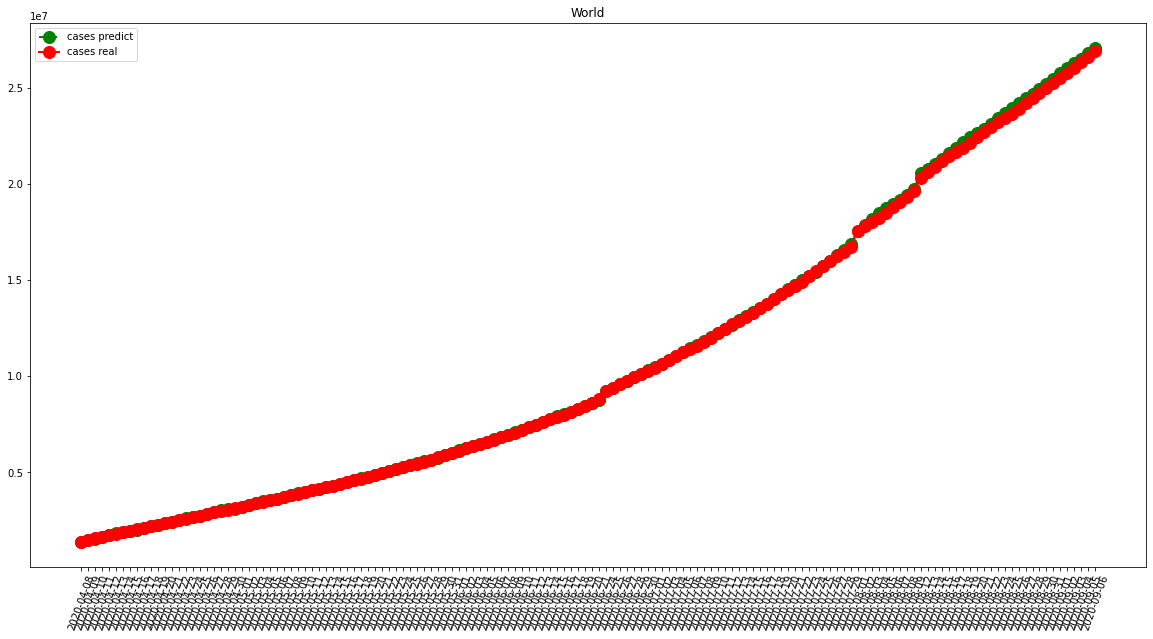

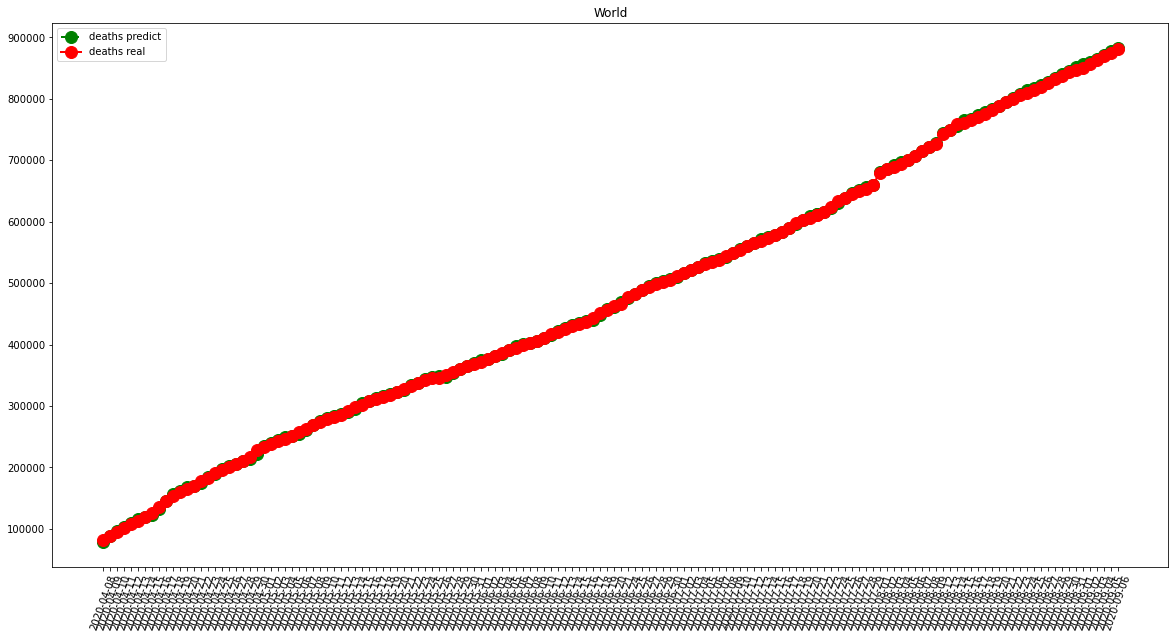

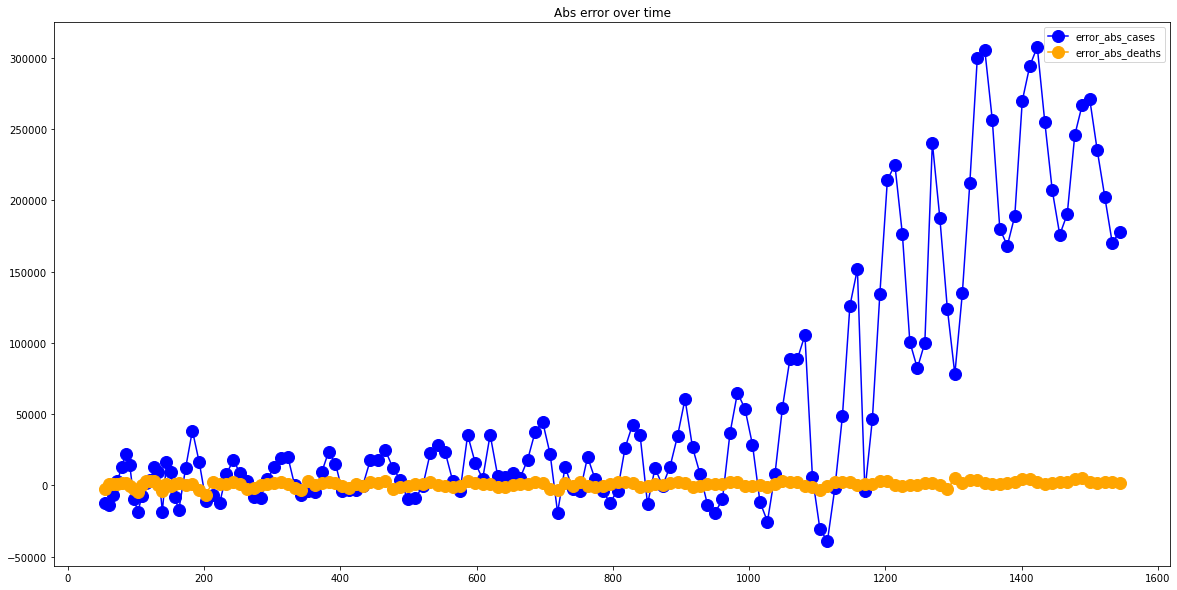

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1023.7261146496816
RMSE =  1529.4242974167314
-- France performances for deaths --
MAE =  119.5732484076433
RMSE =  267.7417593158166


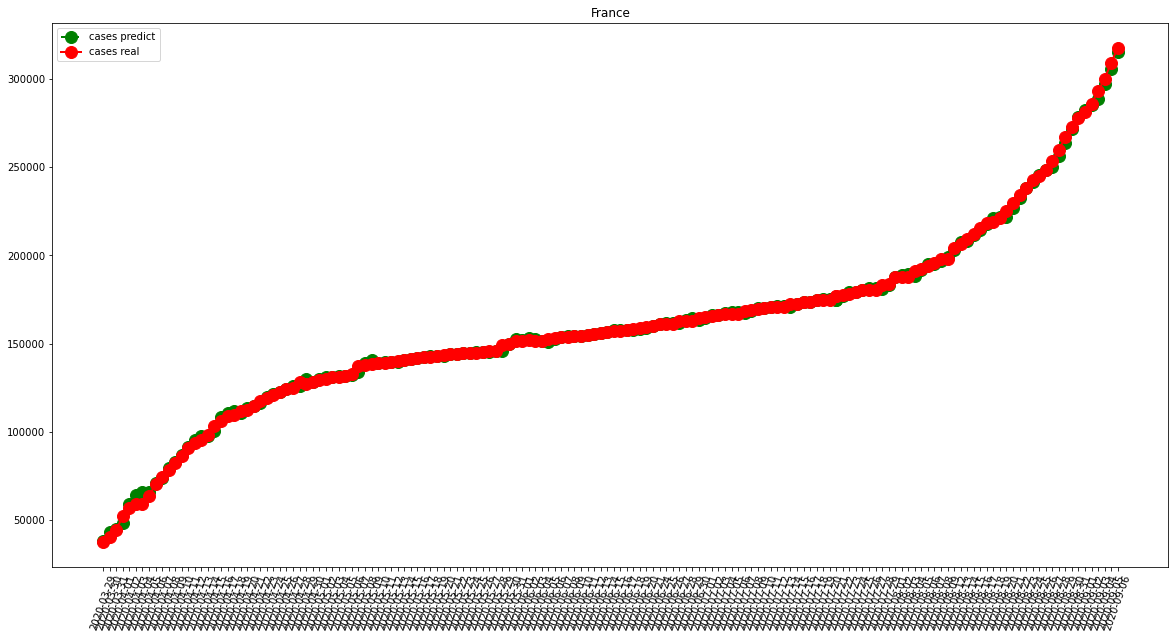

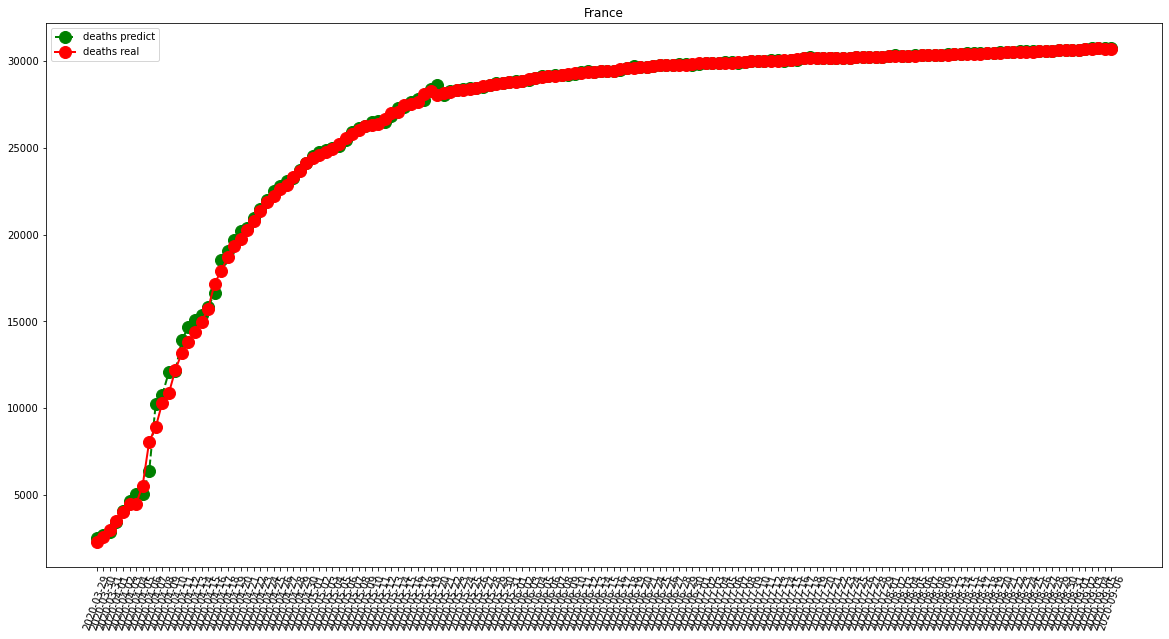

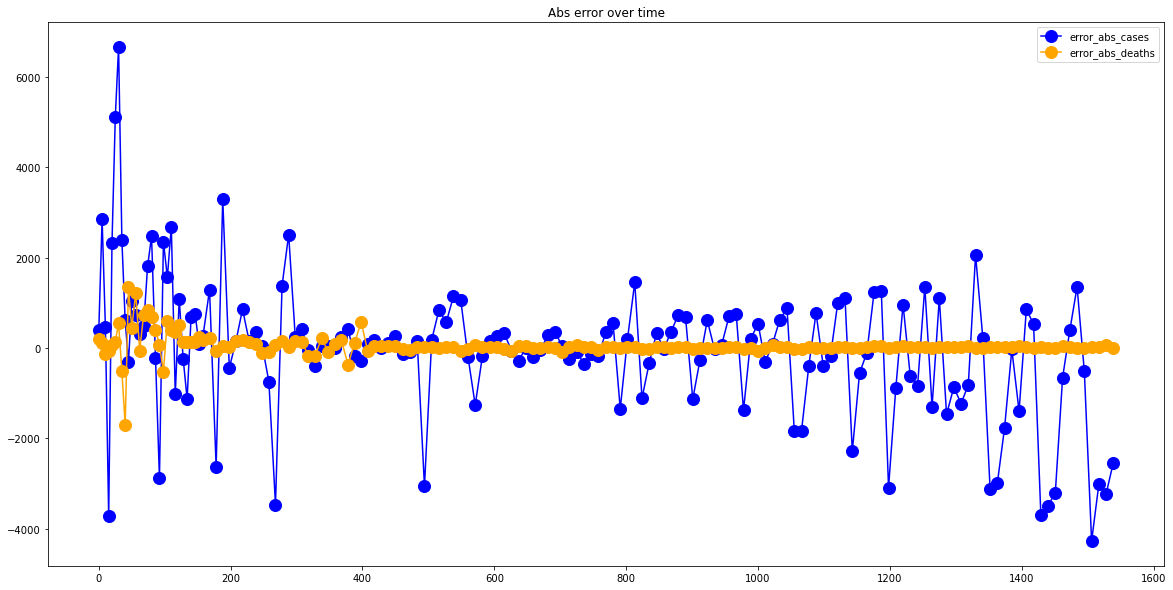

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.2356687898089
RMSE =  455.1798062864338
-- Italy performances for deaths --
MAE =  71.43312101910828
RMSE =  236.92713008043816


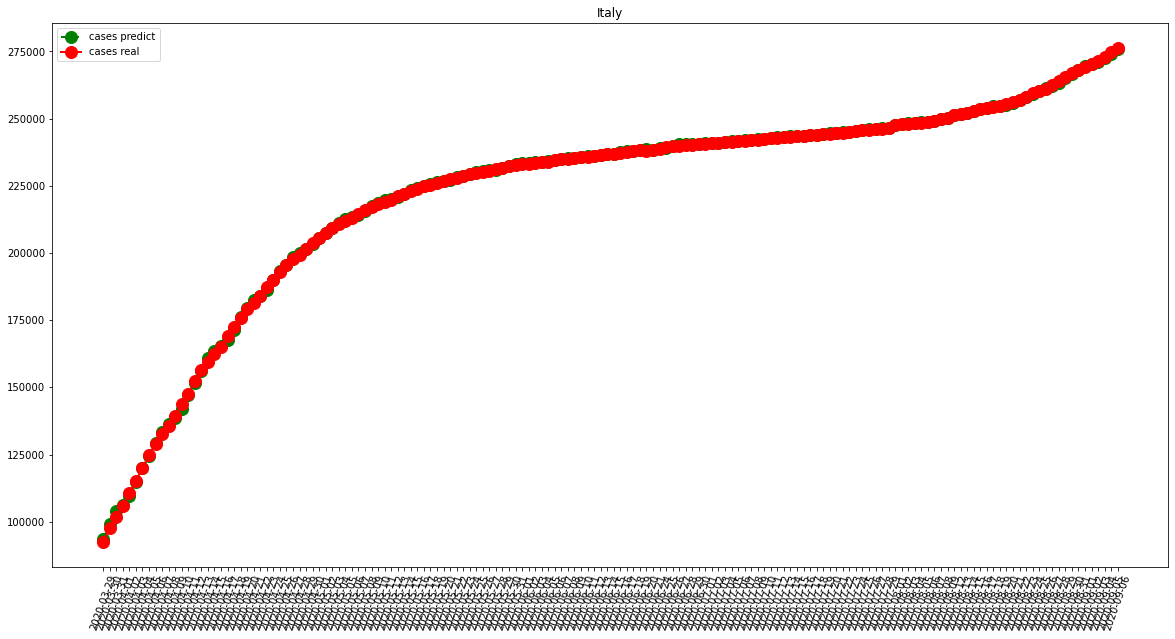

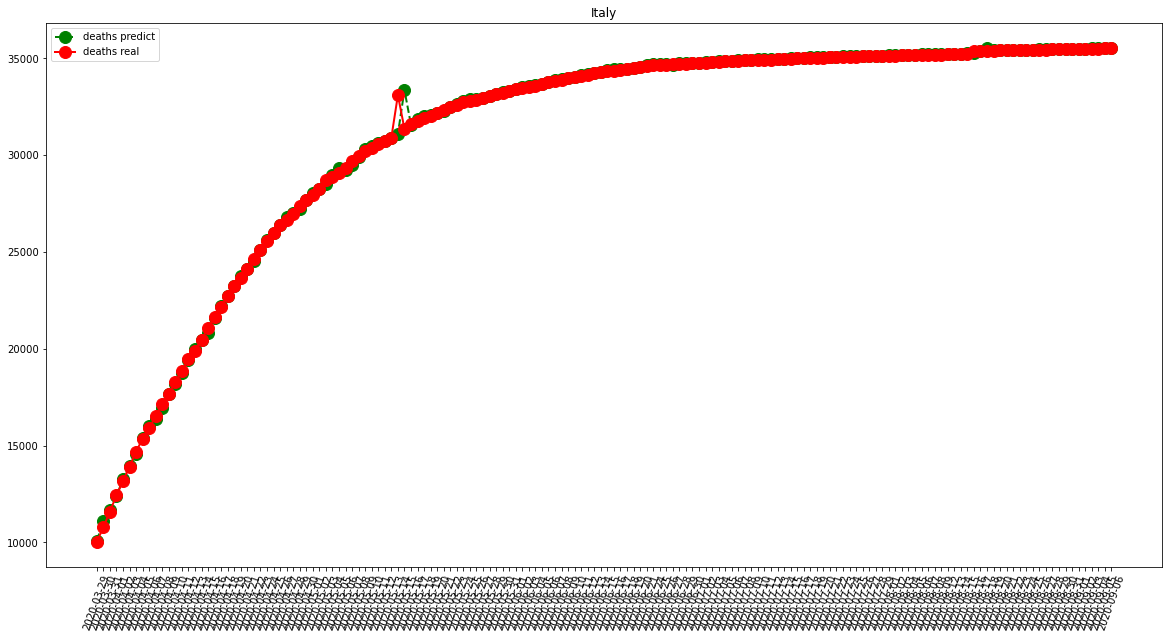

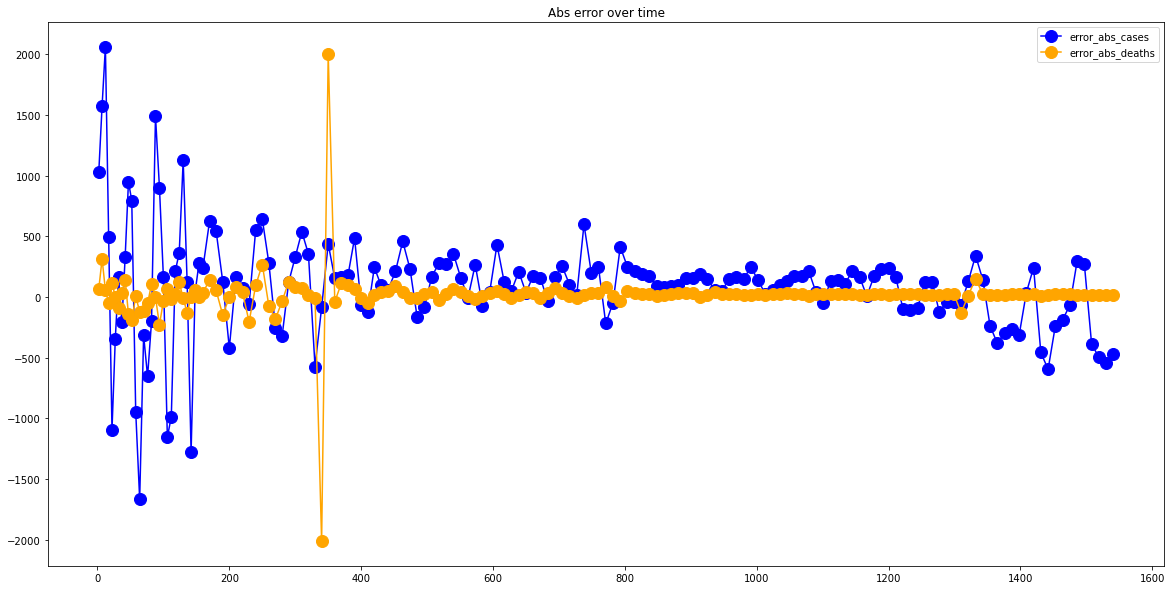

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2030.4777070063694
RMSE =  3906.5900935772197
-- Spain performances for deaths --
MAE =  124.15286624203821
RMSE =  324.57515593023095


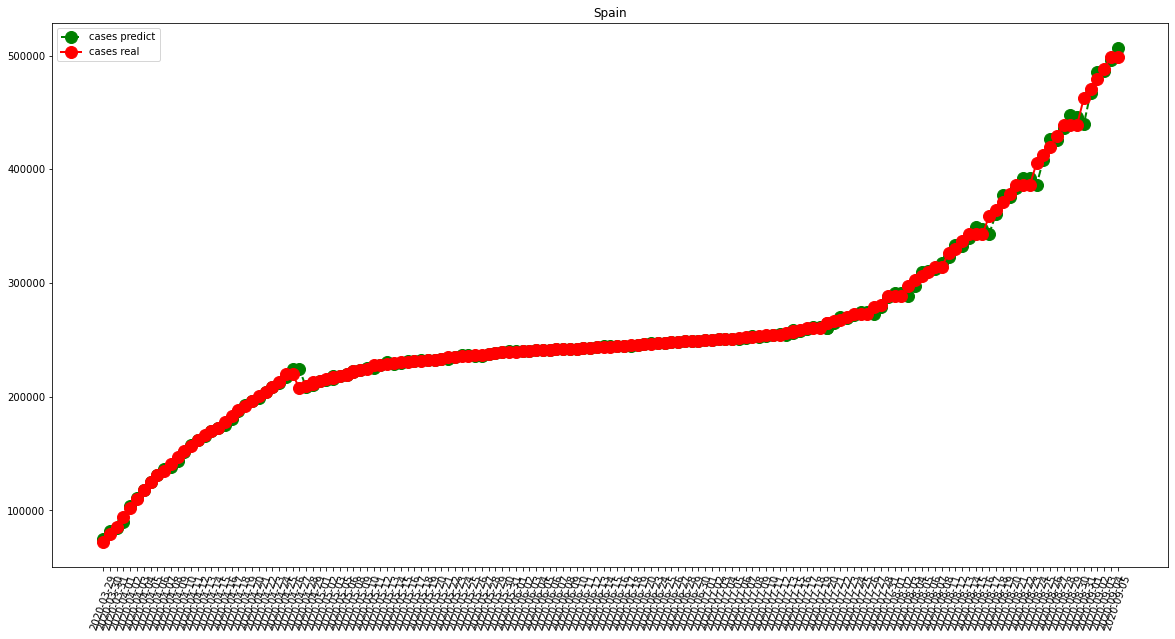

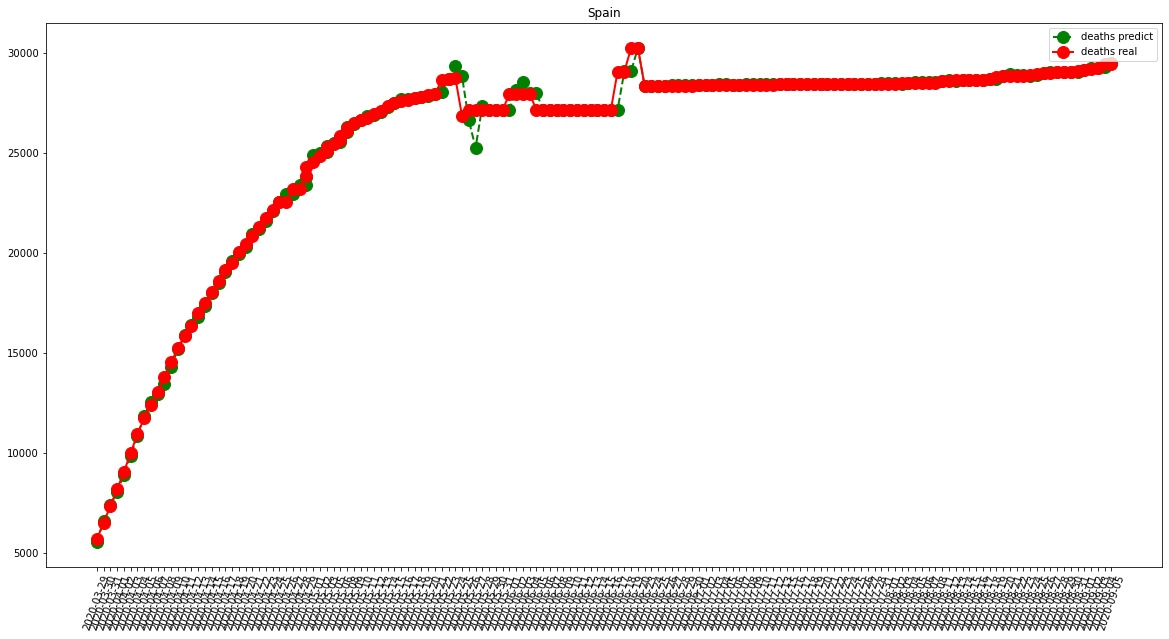

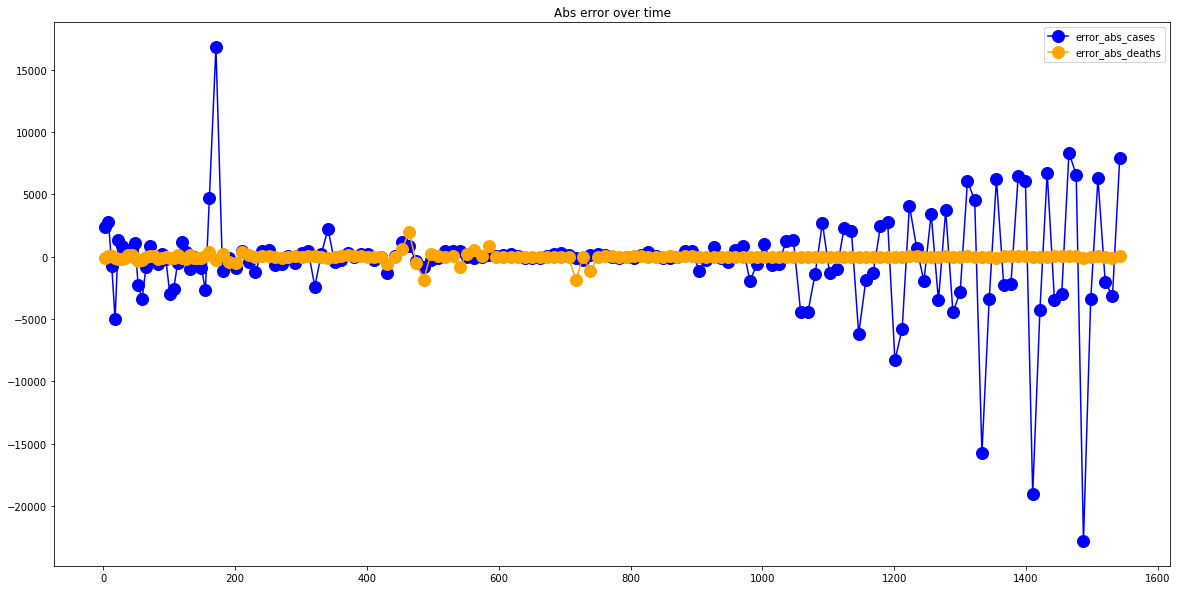

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12968.133757961783
RMSE =  19945.451900359494
-- United States performances for deaths --
MAE =  483.21656050955414
RMSE =  683.6962626911416


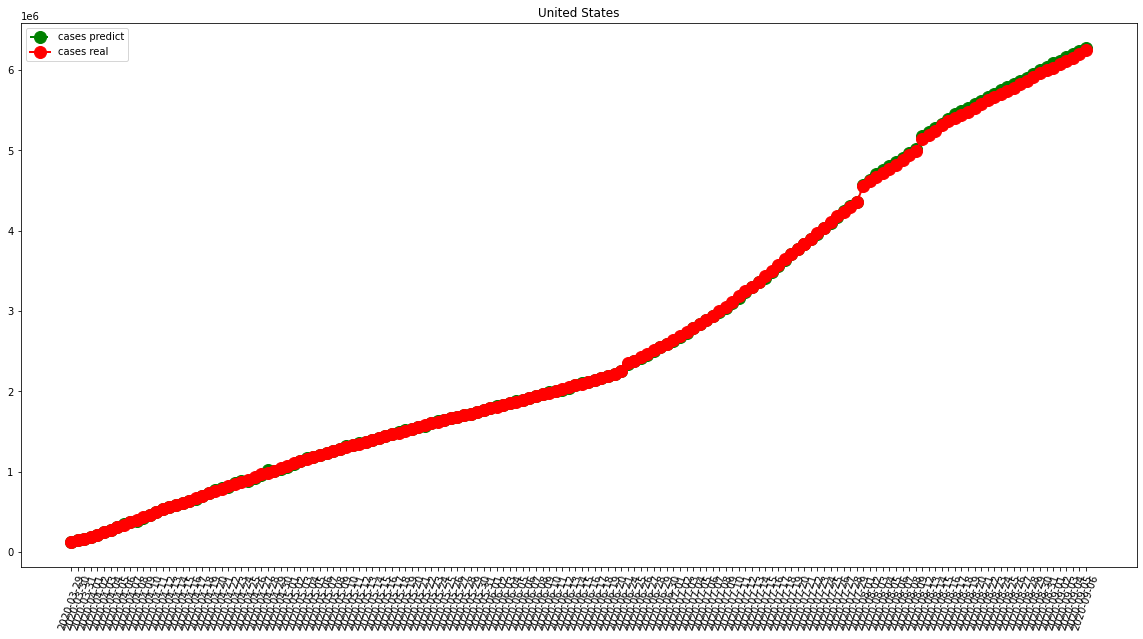

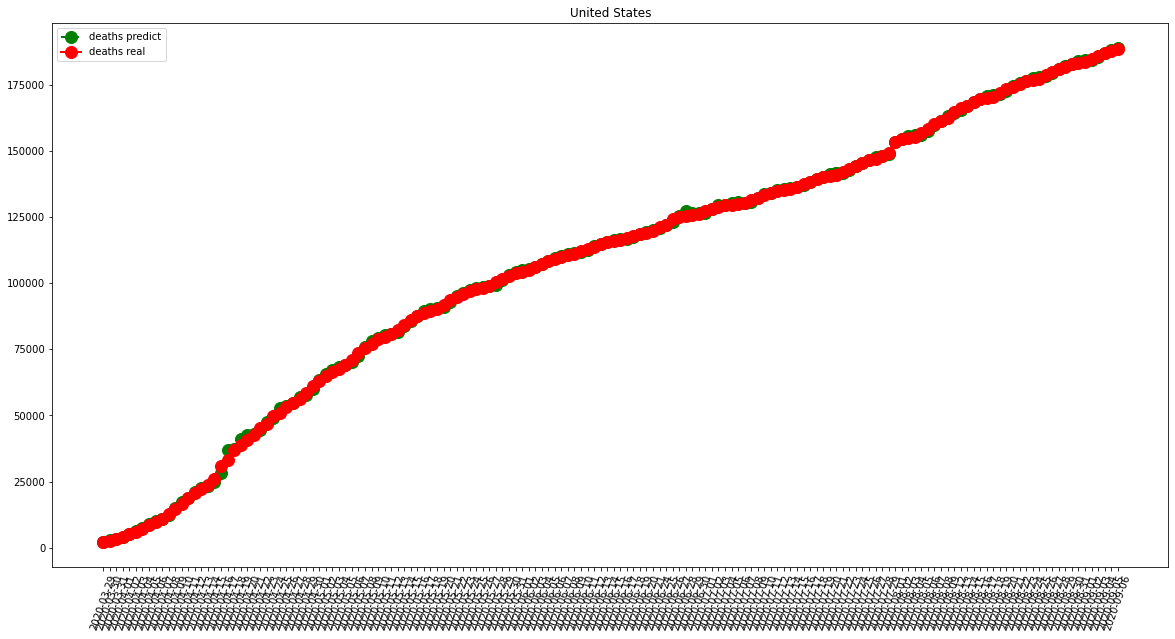

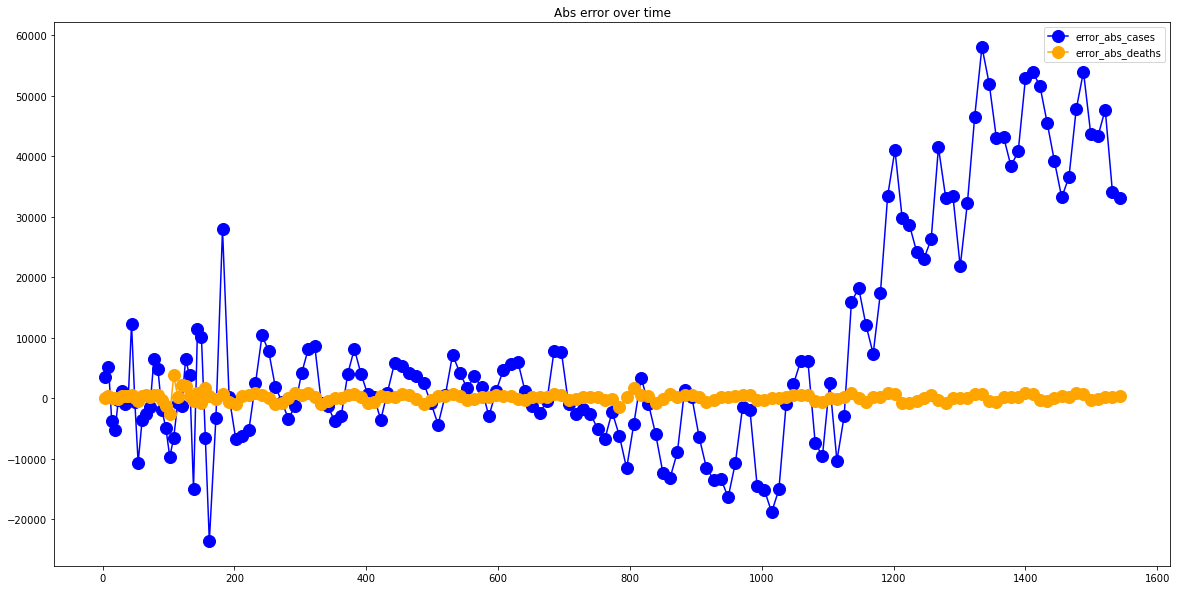

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  63.961783439490446
RMSE =  95.23821959348872
-- China performances for deaths --
MAE =  26.726114649681527
RMSE =  125.32292046910038


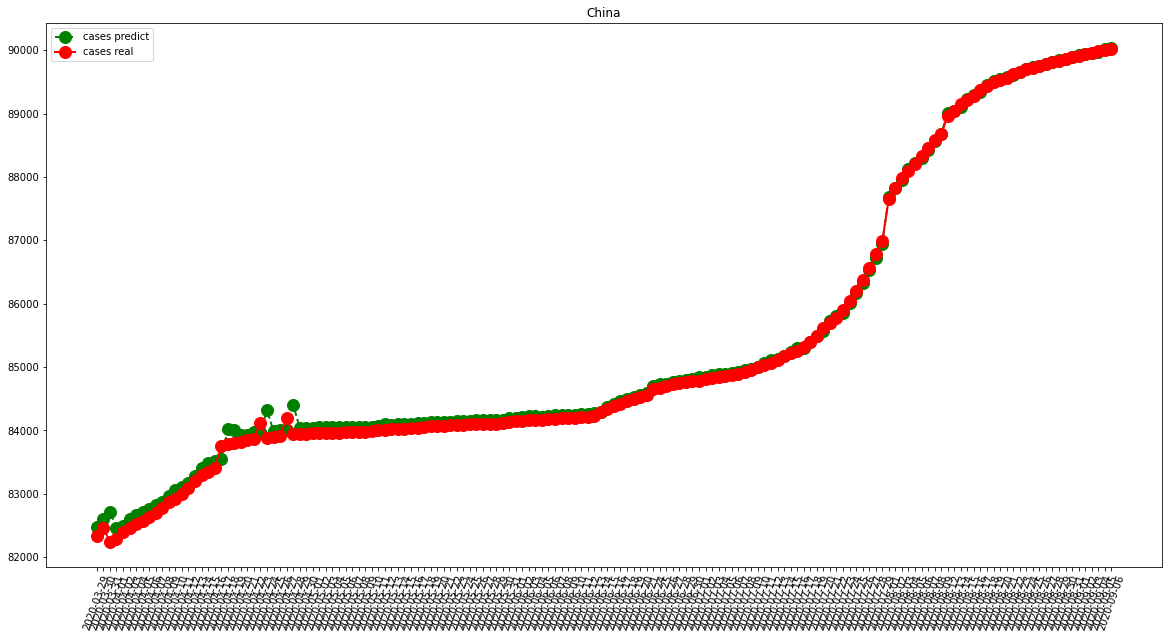

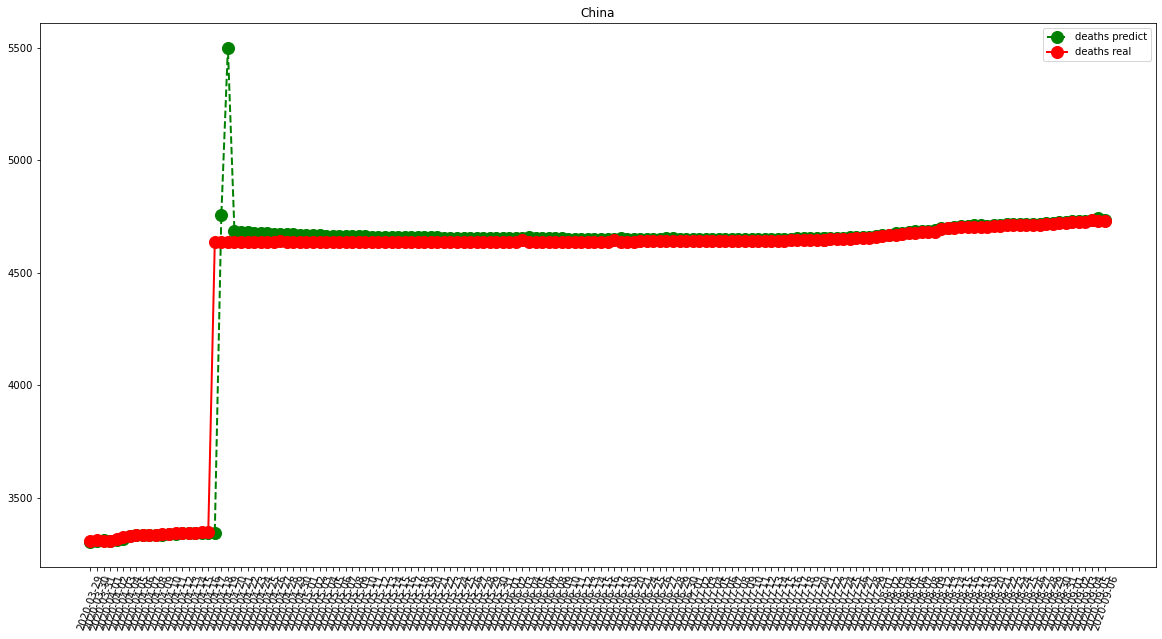

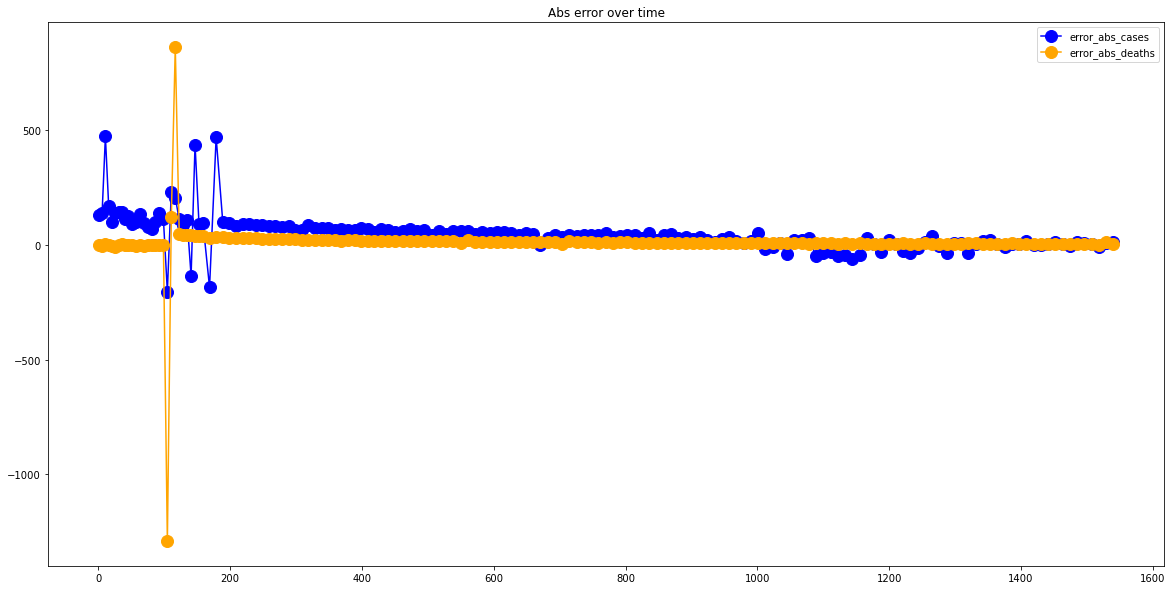

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1030.2403100775193
RMSE =  3682.052459950762
-- United Kingdom performances for deaths --
MAE =  235.6046511627907
RMSE =  751.4117307756693


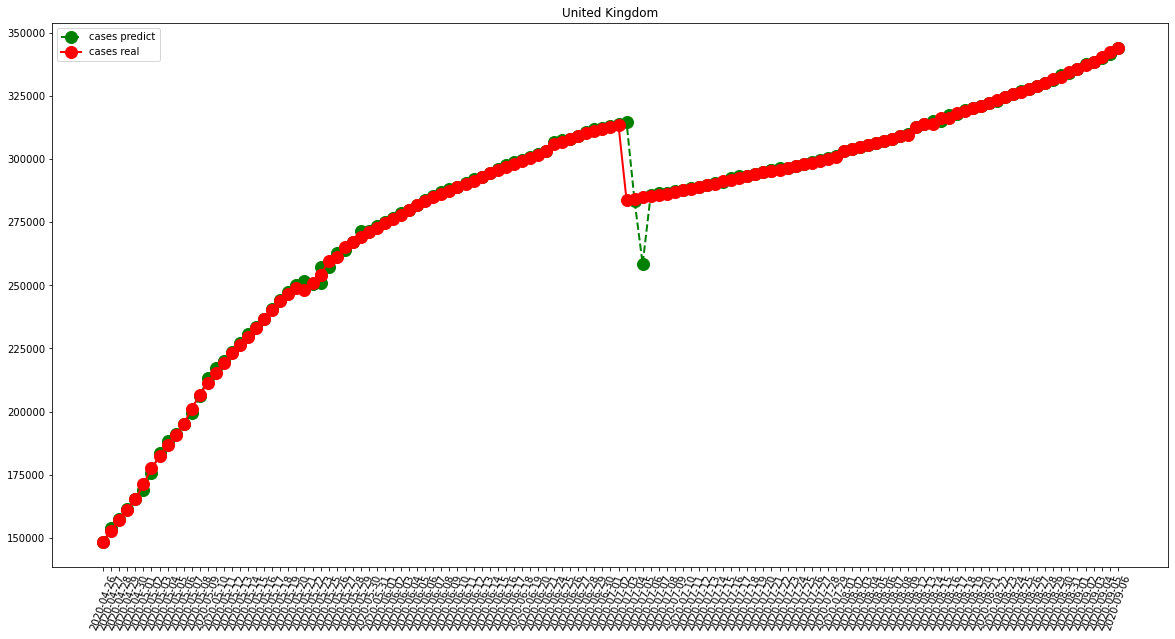

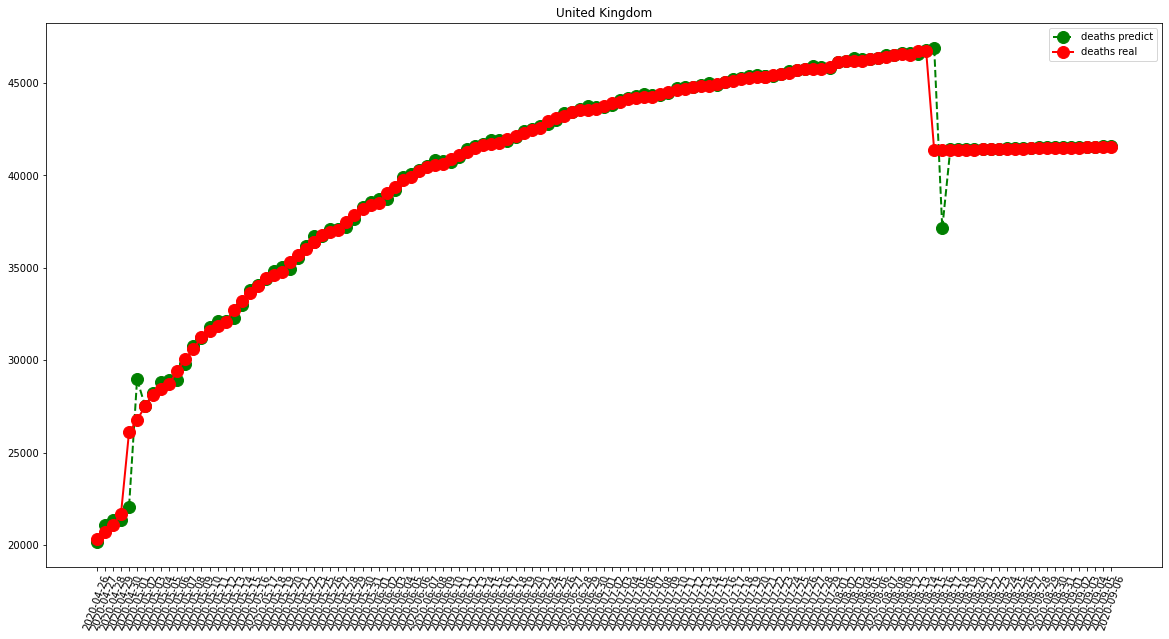

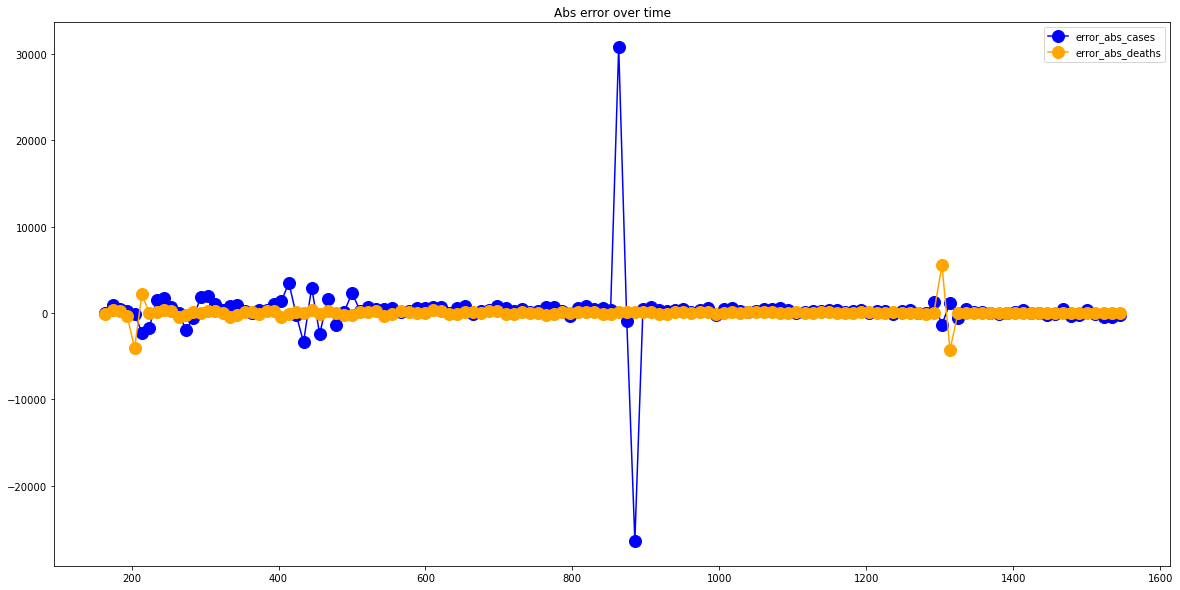

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  401.015503875969
RMSE =  581.4511584066224
-- Germany performances for deaths --
MAE =  20.46511627906977
RMSE =  38.72863251838601


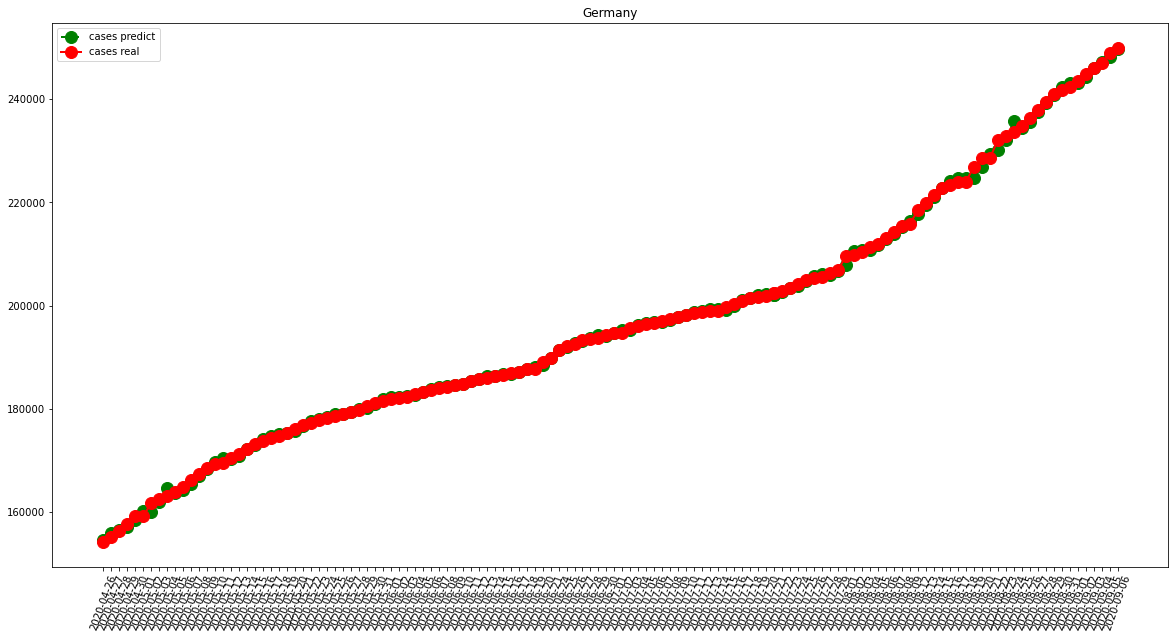

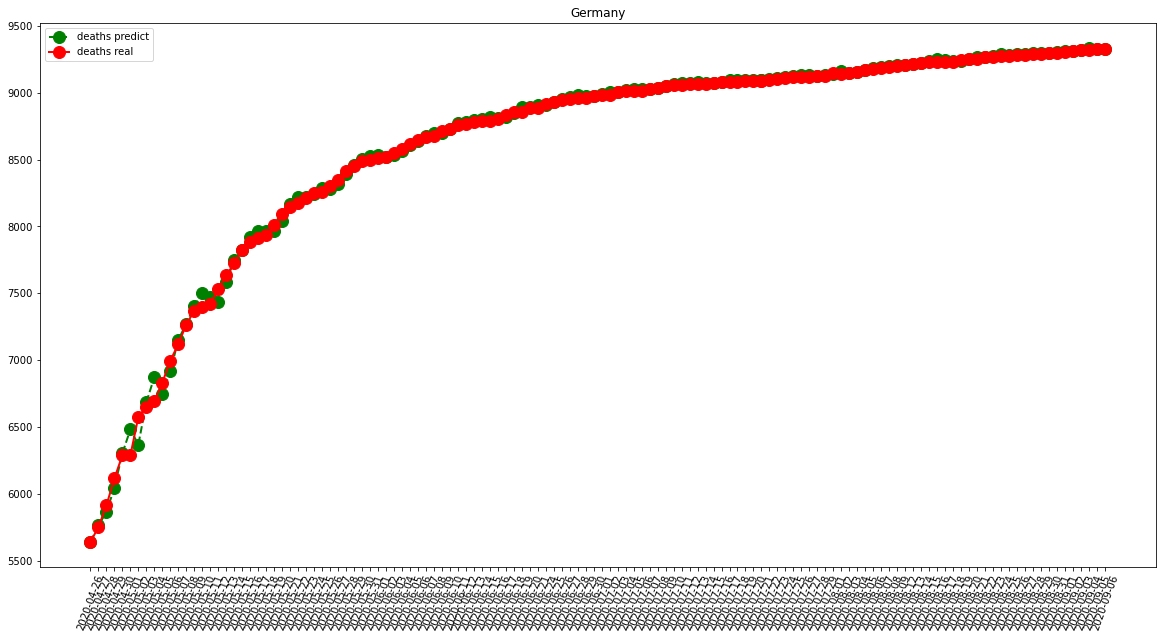

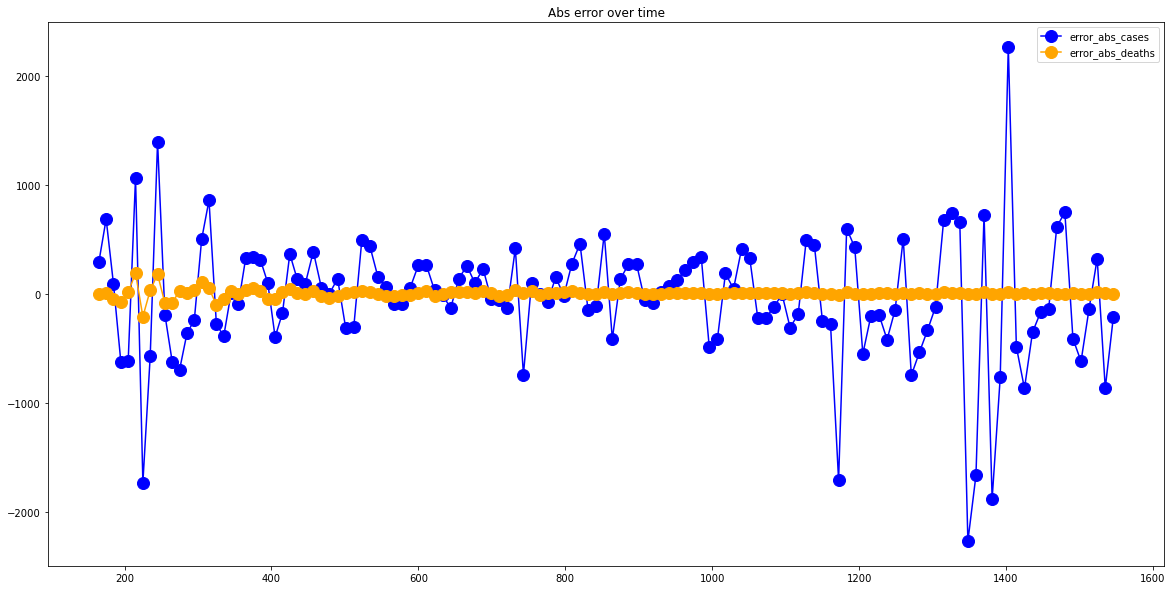

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  846.6046511627907
RMSE =  1224.246124618498
-- Iran performances for deaths --
MAE =  47.945736434108525
RMSE =  84.64000373675641


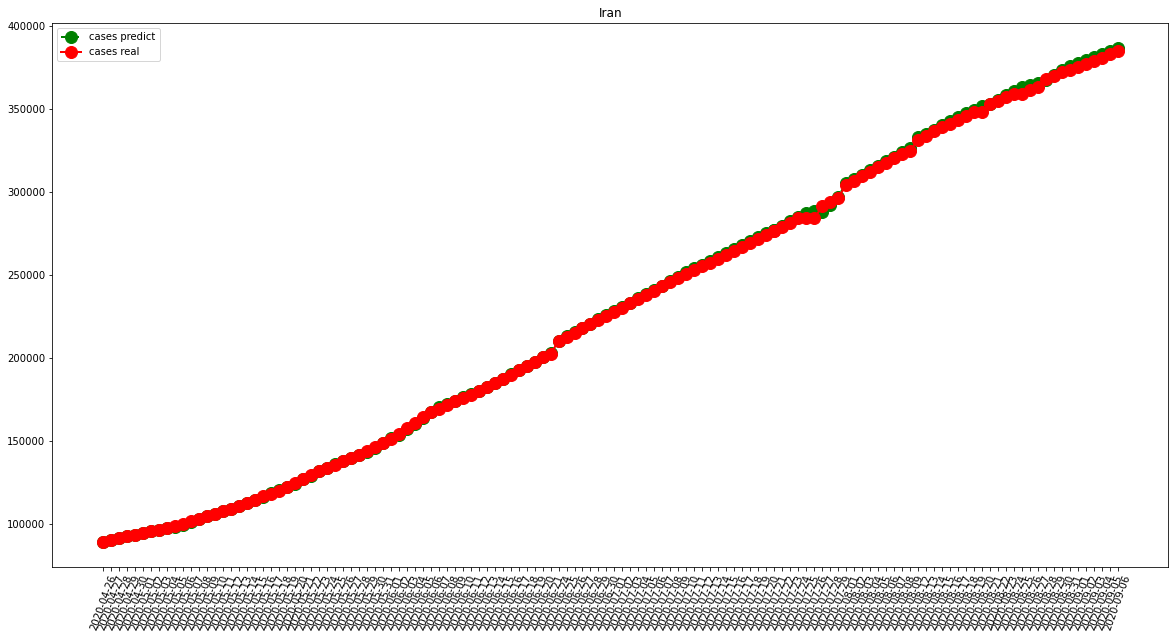

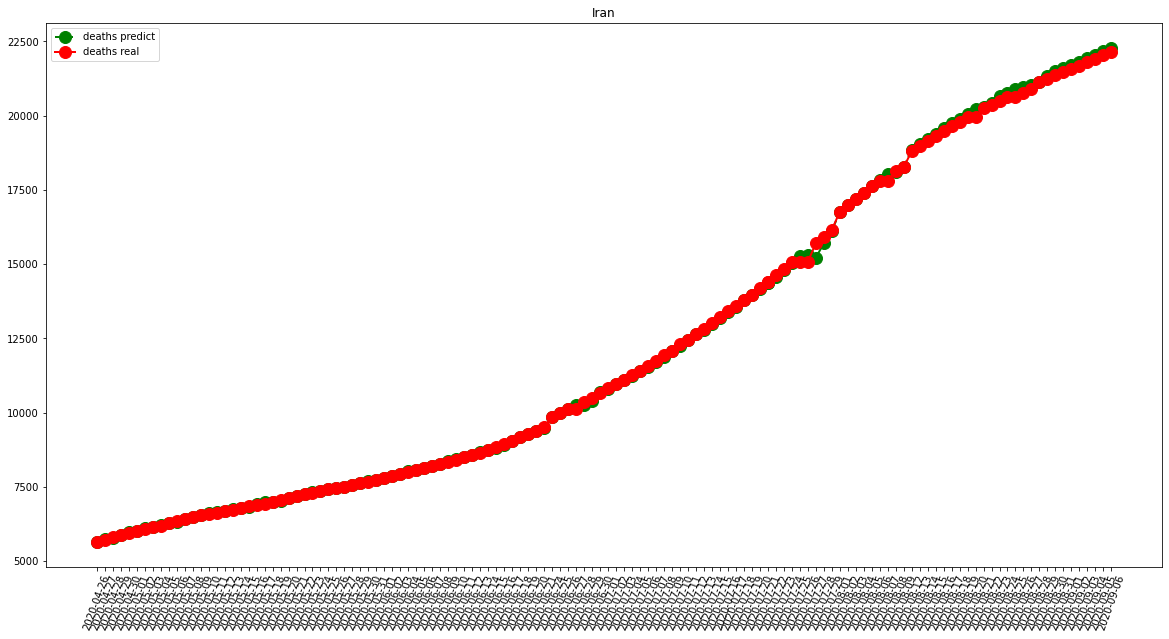

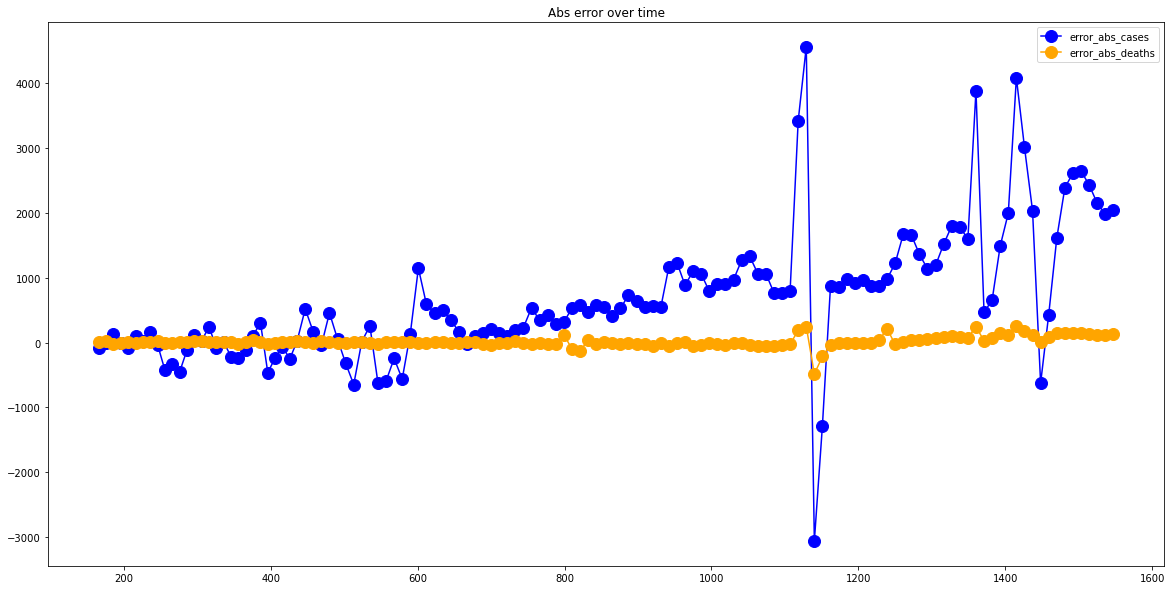

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  207.08527131782947
RMSE =  326.3291722818702
-- Turkey performances for deaths --
MAE =  16.224806201550386
RMSE =  89.4743044834141


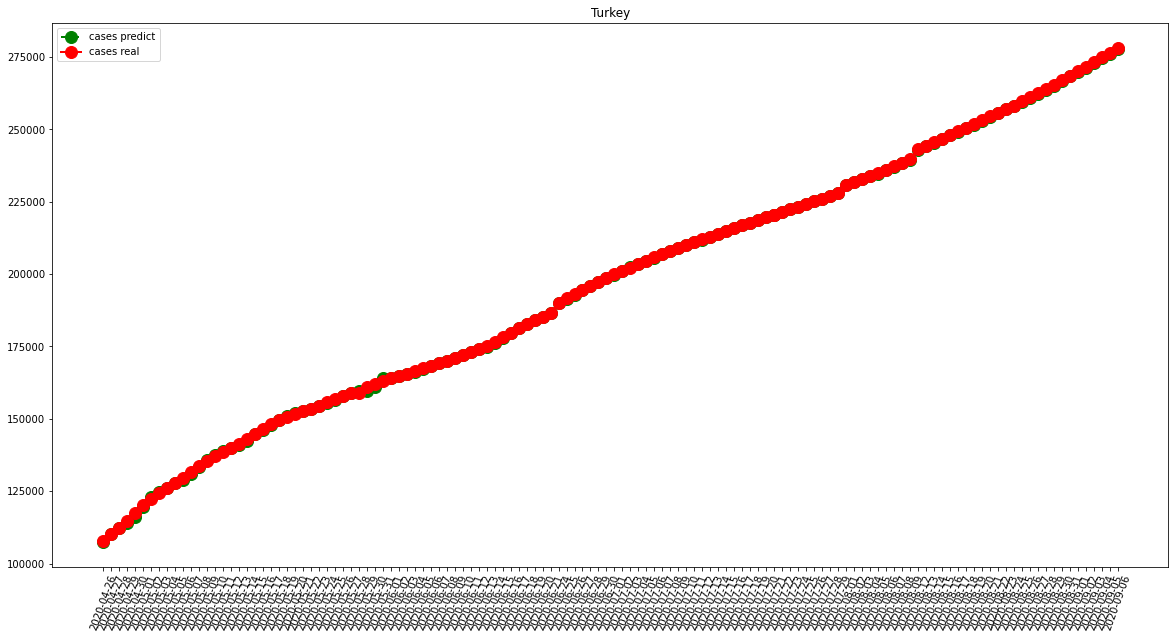

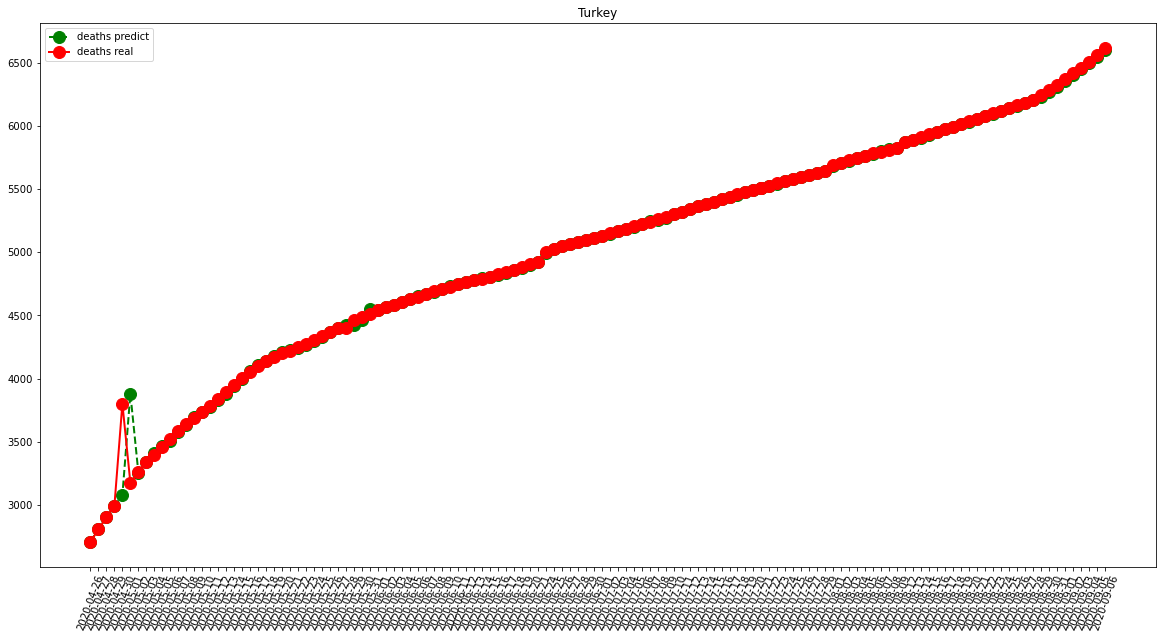

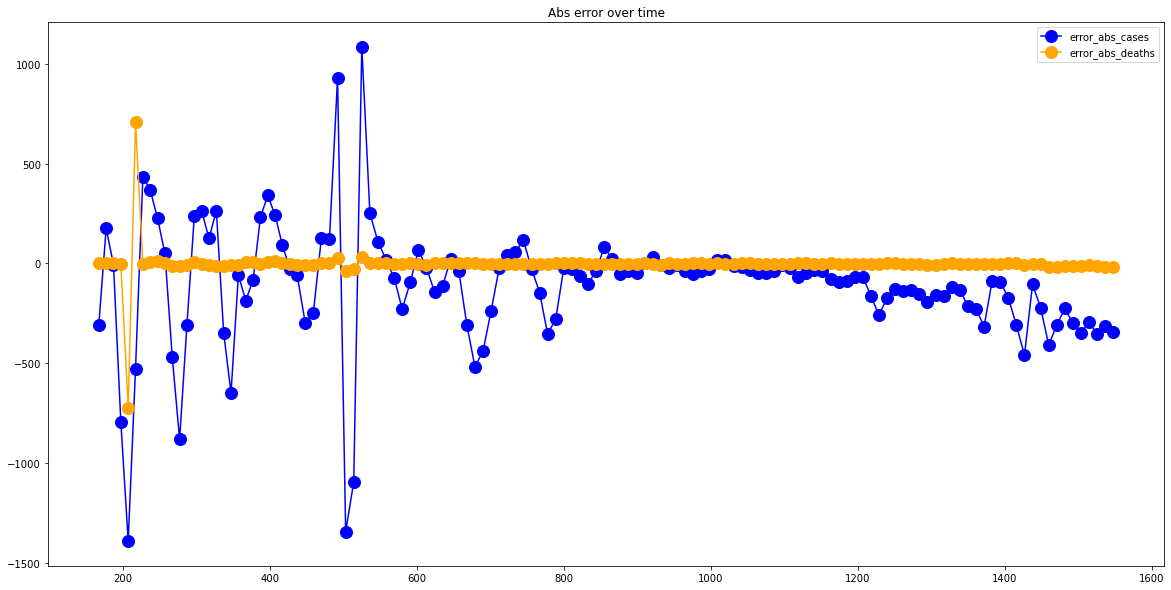

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  14088.490196078432
RMSE =  18523.195512653856
-- Brazil performances for deaths --
MAE =  443.8137254901961
RMSE =  542.181025770805


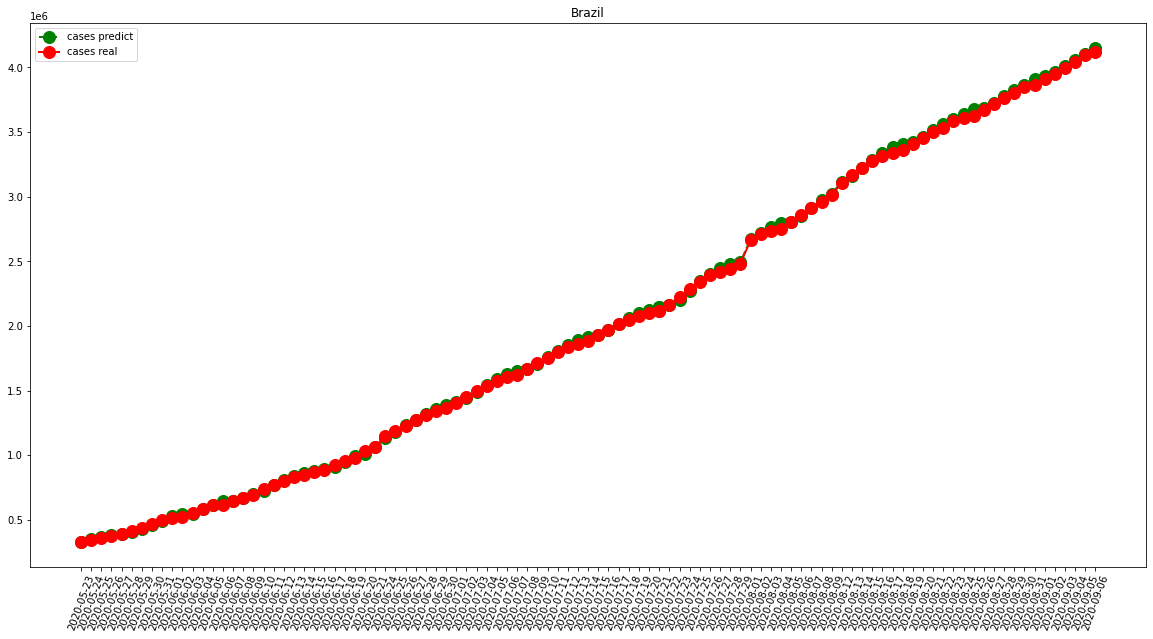

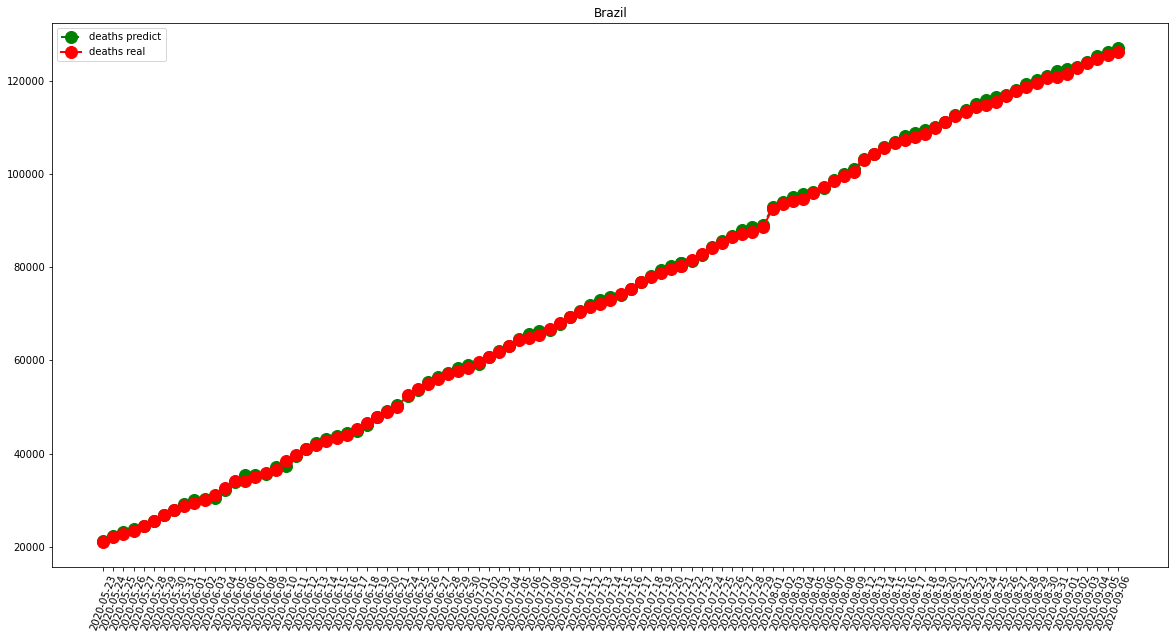

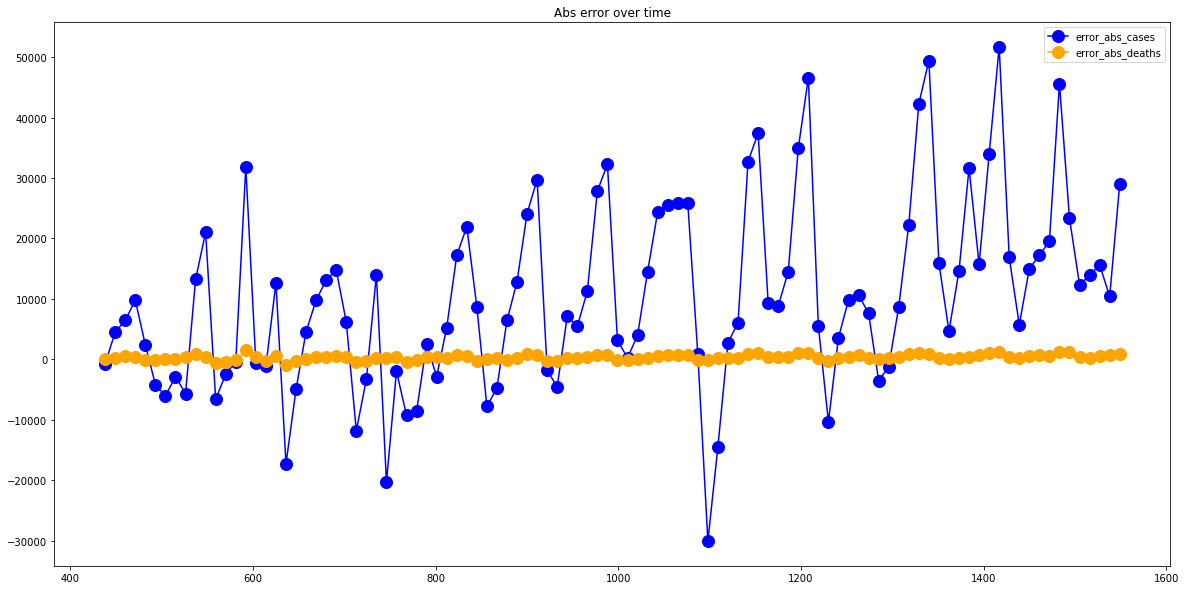

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)